In [3]:
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()  # for multi-class (two classes here)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


Epoch 1/10, Loss: 0.1615, Accuracy: 94.02%
Epoch 2/10, Loss: 0.0723, Accuracy: 98.09%
Epoch 3/10, Loss: 0.1103, Accuracy: 96.27%
Epoch 4/10, Loss: 0.0465, Accuracy: 98.70%
Epoch 5/10, Loss: 0.1837, Accuracy: 95.58%
Epoch 6/10, Loss: 0.0238, Accuracy: 99.31%
Epoch 7/10, Loss: 0.1225, Accuracy: 96.10%
Epoch 8/10, Loss: 0.0139, Accuracy: 99.65%
Epoch 9/10, Loss: 0.0205, Accuracy: 99.57%
Epoch 10/10, Loss: 0.0440, Accuracy: 98.79%


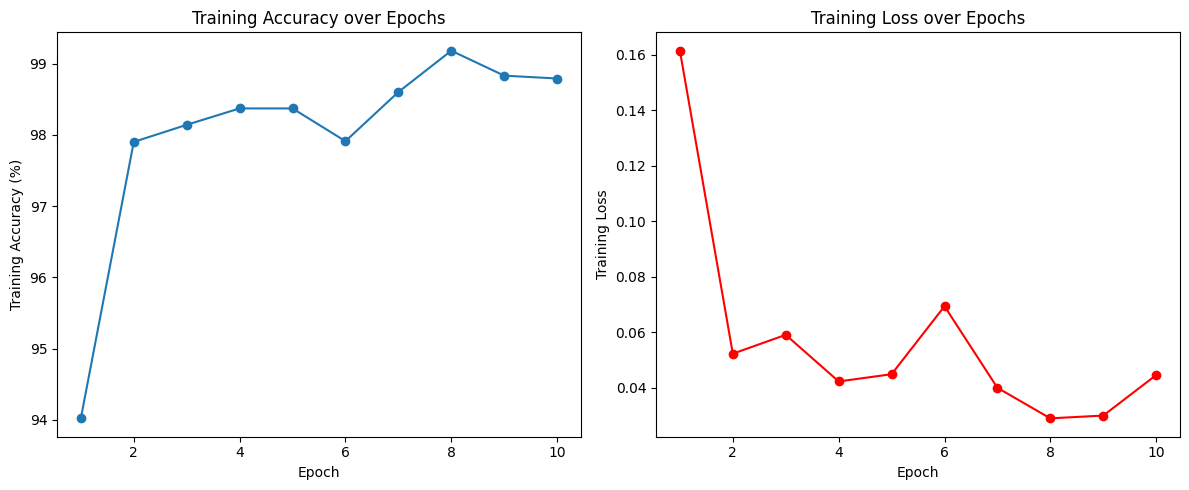

In [4]:
import matplotlib.pyplot as plt

# Assuming you stored these values in lists during training
epochs = range(1, num_epochs+1)
train_accuracies = [94.02, 97.90, 98.14, 98.37, 98.37, 97.91, 98.60, 99.18, 98.83, 98.79]  # example values
train_losses = [0.1615, 0.0523, 0.0591, 0.0423, 0.0449, 0.0694, 0.0400, 0.0290, 0.0300, 0.0446]  # example values

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(epochs, train_losses, marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')

plt.tight_layout()
plt.show()


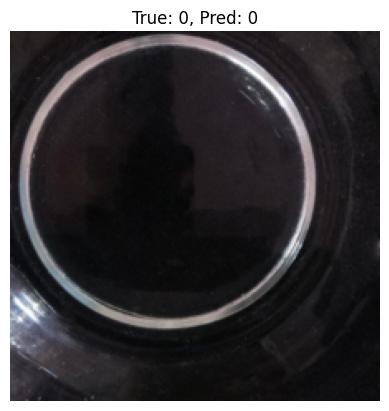

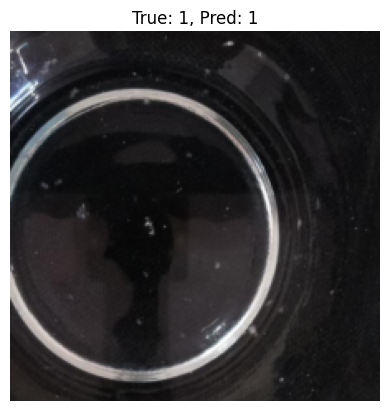

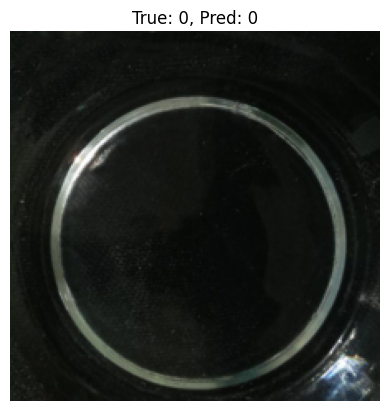

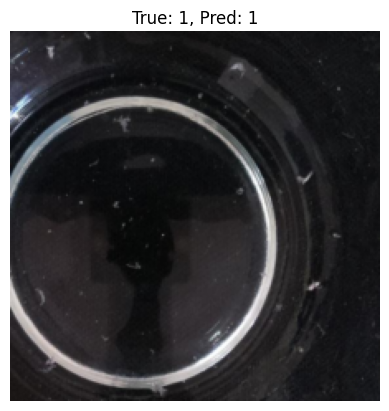

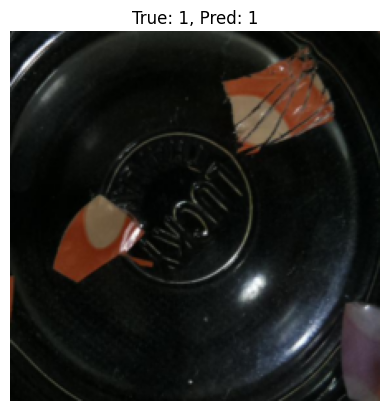

In [8]:
import numpy as np

model.eval()
with torch.no_grad():
    for i in range(5):  # Show 5 sample images
        img, label = val_data[i]  # val_data: validation dataset
        img = img.unsqueeze(0).to(device)
        output = model(img)
        pred = output.argmax(1).item()
        plt.imshow(img.cpu().squeeze().permute(1,2,0))
        plt.title(f"True: {label}, Pred: {pred}")
        plt.axis('off')
        plt.show()


In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the dataset
full_data = datasets.ImageFolder('D:/Downloads/Resources/1_Training', transform=data_transforms)

# Split the data into train and validation sets (e.g., 80% train, 20% val)
train_size = int(0.8 * len(full_data))
val_size = len(full_data) - train_size
train_data, val_data = random_split(full_data, [train_size, val_size])

# Create DataLoaders for both
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=True)


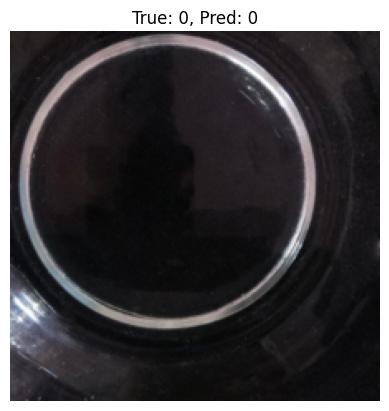

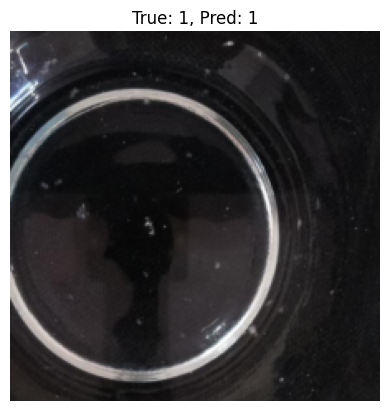

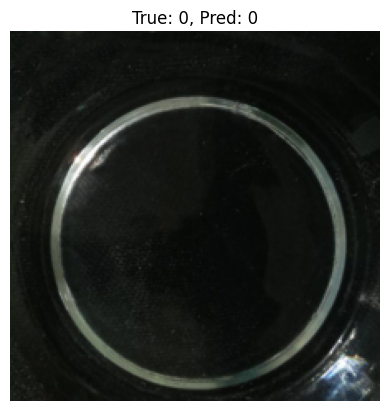

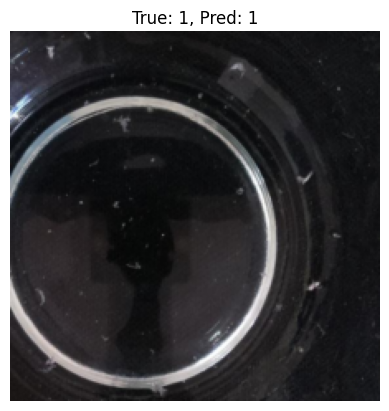

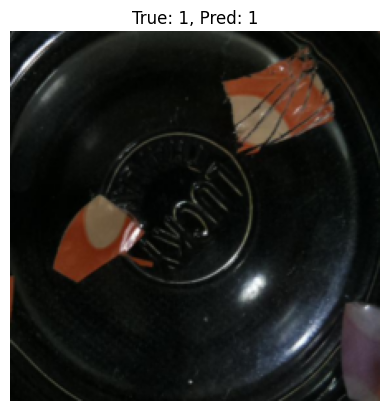

In [7]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    for i in range(5):  # show 5 samples
        img, label = val_data[i]  # This works now!
        img_batch = img.unsqueeze(0).to(device)
        output = model(img_batch)
        pred = output.argmax(1).item() if output.shape[1] > 1 else int(output.sigmoid().item() > 0.5)

        plt.imshow(img.permute(1, 2, 0).cpu().numpy())
        plt.title(f"True: {label}, Pred: {pred}")
        plt.axis('off')
        plt.show()
